# Verification hydrostatique

In [1]:
from trustutils import run

run.introduction('Y.G')
run.description('Calcul sans diffusion ni convection de QDM. On verifie l’absence de vitesses parasites, et que le profil de pression est exact. Le calcul est mene sur differents maillages (cartesien conforme, triangles et non conforme).')
run.TRUST_parameters()

## Introduction 
 Validation made by : Y.G



 Report generated 28/01/2022

### Description 
Calcul sans diffusion ni convection de QDM. On verifie l’absence de vitesses parasites, et que le profil de pression est exact. Le calcul est mene sur differents maillages (cartesien conforme, triangles et non conforme).

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/PolyMAC/hydrostatique/build)

In [2]:
from trustutils import run 
run.reset()
c1 = run.addCase("cartesian"    ,"jdd.data",nbProcs=1)
c2 = run.addCase("triangle"     ,"jdd.data",nbProcs=1)
c3 = run.addCase("non_conformal","jdd.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* cartesian/jdd.data : 
* triangle/jdd.data : 
* non_conformal/jdd.data : 


Running ...
  => A total of 3 cases were (successfully) run in 1.2s.


## Hydrostatique PolyMAC

### Maillage cartesien

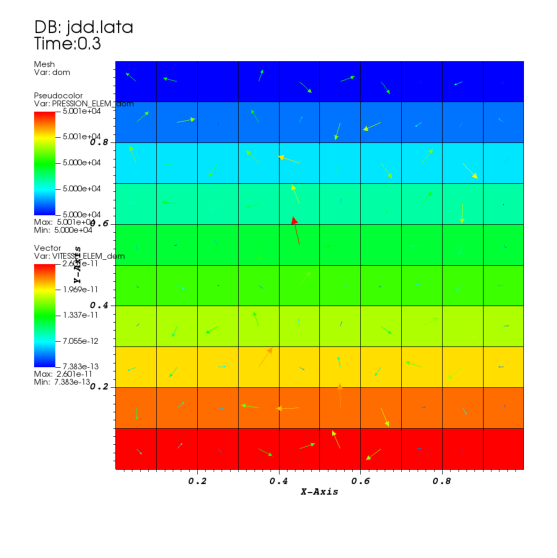

In [3]:
from trustutils import visit
plot=visit.Show("./cartesian/jdd.lata","Pseudocolor","PRESSION_ELEM_dom")
plot.addField("./cartesian/jdd.lata","Vector","VITESSE_ELEM_dom")
plot.plot()

### Maillage de triangles

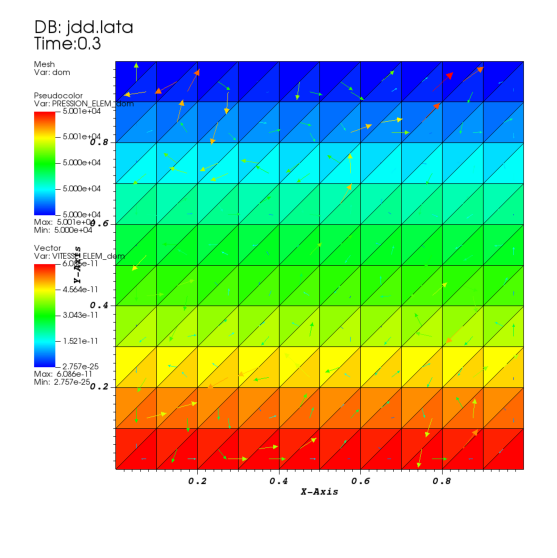

In [4]:
from trustutils import visit
plot=visit.Show("./triangle/jdd.lata","Pseudocolor","PRESSION_ELEM_dom")
plot.addField("./triangle/jdd.lata","Vector","VITESSE_ELEM_dom")
plot.plot()

### Maillage non conforme

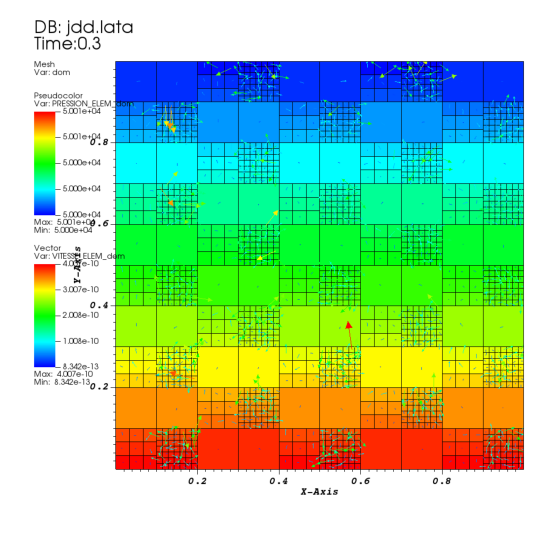

In [5]:
from trustutils import visit
plot=visit.Show("./non_conformal/jdd.lata","Pseudocolor","PRESSION_ELEM_dom")
plot.addField("./non_conformal/jdd.lata","Vector","VITESSE_ELEM_dom")
plot.plot()

### Comparaison theorie/numerique

In [6]:
from trustutils.jupyter import plot
import numpy as np

columns=["$$\| P\|_\infty$$","$$\| \overrightarrow{v}\|_\infty$$"]
Table=plot.Table(columns) 
Table.addLigne([plot.loadText("cartesian/erreurs.txt")],"Cartesien") 
Table.addLigne([plot.loadText("triangle/erreurs.txt")],"Triangles") 
Table.addLigne([plot.loadText("non_conformal/erreurs.txt")],"Non conforme") 
Table.df

,$$\| P\|_\infty$$,$$\| \overrightarrow{v}\|_\infty$$
Cartesien,0.0,2.600549e-11
Triangles,0.0,6.085961e-11
Non conforme,0.0,4.006832e-10
